Numeric features: ['age']
Categorical features: ['sex', 'breed', 'size', 'neutered', 'housebroken', 'likes_people', 'get_along_males', 'get_along_females', 'get_along_cats', 'coat', 'color', 'keep_in']
Accuracy: 0.9606557377049181

Classification report:
               precision    recall  f1-score   support

          no       0.50      0.08      0.14        12
         yes       0.96      1.00      0.98       293

    accuracy                           0.96       305
   macro avg       0.73      0.54      0.56       305
weighted avg       0.95      0.96      0.95       305



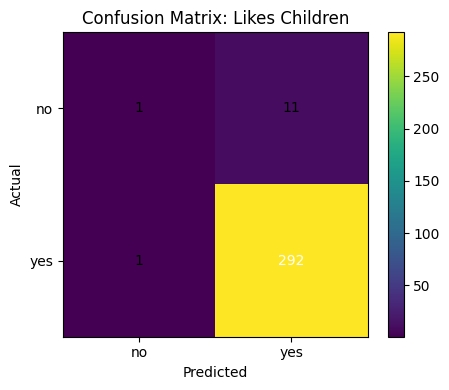

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix
)
import matplotlib.pyplot as plt

# 1. Load data
df = pd.read_csv("ShelterDogs.csv")

# 2. Drop rows where the TARGET is missing
df = df.dropna(subset=["likes_children"])

# 3. Encode target: yes/no -> 1/0
df["likes_children"] = df["likes_children"].map({"yes": 1, "no": 0}).astype(int)

# 4. Define feature columns (you can tweak this list)
features = [
    "age",
    "sex",
    "breed",
    "size",
    "neutered",
    "housebroken",
    "likes_people",
    "get_along_males",
    "get_along_females",
    "get_along_cats",
    "coat",
    "color",
    "keep_in",
]

X = df[features].copy()
y = df["likes_children"]

# 5. Split numeric vs categorical columns
num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()

print("Numeric features:", num_cols)
print("Categorical features:", cat_cols)

# 6. Preprocessing for numeric and categorical data
numeric_transformer = SimpleImputer(strategy="median")

categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols),
    ]
)

# 7. Define the model
model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight="balanced",
)

# 8. Build full pipeline: preprocessing + model
clf = Pipeline(
    steps=[
        ("preprocess", preprocessor),
        ("model", model),
    ]
)

# 9. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

# 10. Fit the model
clf.fit(X_train, y_train)

# 11. Evaluate
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred, target_names=["no", "yes"]))

# 12. Confusion matrix plot
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
plt.imshow(cm, interpolation="nearest")
plt.title("Confusion Matrix: Likes Children")
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ["no", "yes"])
plt.yticks(tick_marks, ["no", "yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Annotate numbers
thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(
            j, i, cm[i, j],
            ha="center", va="center",
            color="white" if cm[i, j] > thresh else "black",
        )
plt.tight_layout()
plt.show()